In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
n_pts = 500
X, y = datasets.make_circles(n_pts, 
                             random_state = 123, 
                             noise = 0.1, 
                             factor = 0.2)

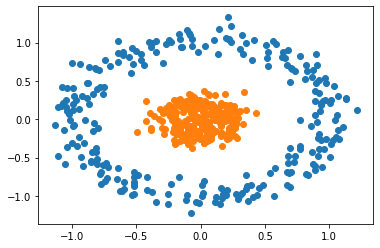

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

plt.show()

In [4]:
model = Sequential()
model.add(Dense(4, input_shape = (2, ), activation = "sigmoid"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(Adam(lr = 0.01), "binary_crossentropy", metrics = ['accuracy'])

In [5]:
history = model.fit(x = X, 
                    y = y, 
                    verbose = 1, 
                    batch_size = 20,
                    epochs = 200, 
                    shuffle = 'true')

Epoch 1/200
500/500 [==============================] - 0s 217us/step - loss: 0.7200 - accuracy: 0.5000
Epoch 2/200
500/500 [==============================] - 0s 51us/step - loss: 0.6957 - accuracy: 0.6080
Epoch 3/200
500/500 [==============================] - 0s 40us/step - loss: 0.6968 - accuracy: 0.3640
Epoch 4/200
500/500 [==============================] - 0s 42us/step - loss: 0.6951 - accuracy: 0.5080
Epoch 5/200
500/500 [==============================] - 0s 37us/step - loss: 0.6942 - accuracy: 0.5380
Epoch 6/200
500/500 [==============================] - 0s 36us/step - loss: 0.6936 - accuracy: 0.6180
Epoch 7/200
500/500 [==============================] - 0s 37us/step - loss: 0.6949 - accuracy: 0.5900
Epoch 8/200
500/500 [==============================] - 0s 34us/step - loss: 0.6934 - accuracy: 0.4880
Epoch 9/200
500/500 [==============================] - 0s 34us/step - loss: 0.6925 - accuracy: 0.5340
Epoch 10/200
500/500 [==============================] - 0s 35us/step - loss: 0.69

500/500 [==============================] - 0s 32us/step - loss: 0.2254 - accuracy: 0.9220
Epoch 81/200
500/500 [==============================] - 0s 33us/step - loss: 0.2123 - accuracy: 0.9360
Epoch 82/200
500/500 [==============================] - 0s 32us/step - loss: 0.1994 - accuracy: 0.9580
Epoch 83/200
500/500 [==============================] - 0s 34us/step - loss: 0.1886 - accuracy: 0.9660
Epoch 84/200
500/500 [==============================] - 0s 33us/step - loss: 0.1765 - accuracy: 0.9740
Epoch 85/200
500/500 [==============================] - 0s 32us/step - loss: 0.1664 - accuracy: 0.9840
Epoch 86/200
500/500 [==============================] - 0s 33us/step - loss: 0.1563 - accuracy: 0.9860
Epoch 87/200
500/500 [==============================] - 0s 31us/step - loss: 0.1477 - accuracy: 0.9880
Epoch 88/200
500/500 [==============================] - 0s 33us/step - loss: 0.1396 - accuracy: 0.9880
Epoch 89/200
500/500 [==============================] - 0s 30us/step - loss: 0.1320 - 

500/500 [==============================] - 0s 33us/step - loss: 0.0183 - accuracy: 1.0000
Epoch 160/200
500/500 [==============================] - 0s 31us/step - loss: 0.0179 - accuracy: 1.0000
Epoch 161/200
500/500 [==============================] - 0s 31us/step - loss: 0.0176 - accuracy: 1.0000
Epoch 162/200
500/500 [==============================] - 0s 36us/step - loss: 0.0173 - accuracy: 1.0000
Epoch 163/200
500/500 [==============================] - 0s 35us/step - loss: 0.0169 - accuracy: 1.0000
Epoch 164/200
500/500 [==============================] - 0s 35us/step - loss: 0.0166 - accuracy: 1.0000
Epoch 165/200
500/500 [==============================] - 0s 34us/step - loss: 0.0164 - accuracy: 1.0000
Epoch 166/200
500/500 [==============================] - 0s 32us/step - loss: 0.0161 - accuracy: 1.0000
Epoch 167/200
500/500 [==============================] - 0s 32us/step - loss: 0.0158 - accuracy: 1.0000
Epoch 168/200
500/500 [==============================] - 0s 33us/step - loss: 

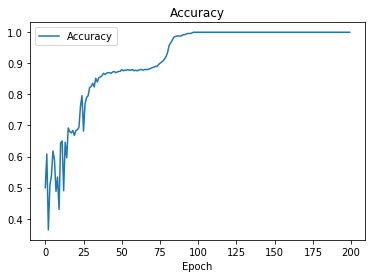

In [6]:
plt.plot(history.history["accuracy"])
plt.xlabel("Epoch")
plt.legend(['Accuracy'])
plt.title("Accuracy")
plt.show()

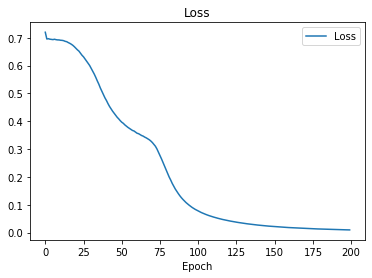

In [7]:
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.legend(['Loss'])
plt.title("Loss")
plt.show()

In [8]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

[[0.99661046]]


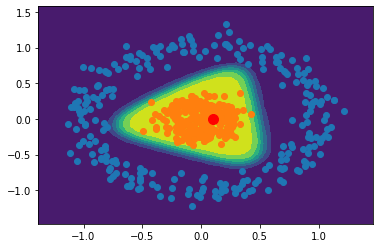

In [9]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

x = 0.1
y = 0.0
point = np.array([[x, y]])
prediction = model.predict(point)
print(prediction)

plt.plot([x], [y], marker = 'o', markersize = 10, color = "red")
plt.show()